In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [2]:
print("[INFO] accessing MNIST...")
(trainX, trainY), (testX, testY) = mnist.load_data()


[INFO] accessing MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1)).astype("float32") / 255.0
testX = testX.reshape((testX.shape[0], 28 * 28 * 1)).astype("float32") / 255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)


In [4]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
print("[INFO] compiling model...")
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.01), metrics=["accuracy"])


[INFO] compiling model...


In [6]:
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)


[INFO] training network...
Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8616 - loss: 0.4379 - val_accuracy: 0.9495 - val_loss: 0.1660
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9611 - loss: 0.1309 - val_accuracy: 0.9676 - val_loss: 0.1234
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9696 - loss: 0.1067 - val_accuracy: 0.9675 - val_loss: 0.1174
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9743 - loss: 0.0903 - val_accuracy: 0.9624 - val_loss: 0.1405
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9772 - loss: 0.0819 - val_accuracy: 0.9675 - val_loss: 0.1293
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9786 - loss: 0.0820 - val_accuracy: 0.9653 - val_loss: 0.1462
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9800 - loss: 0.0730 - val_accuracy: 0.9729 - val_loss: 0.1255
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.98

In [7]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))


[INFO] evaluating network...
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.94      0.98      0.96      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



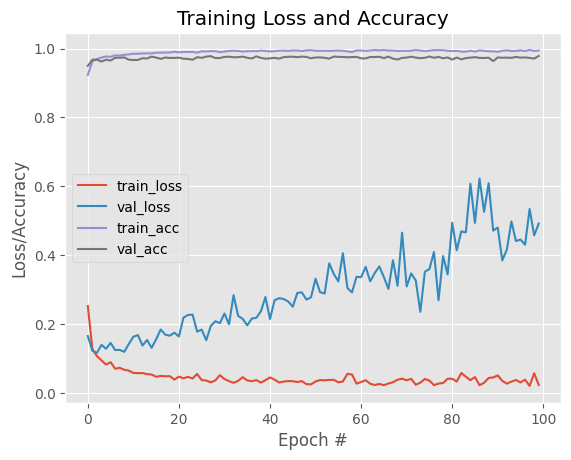

In [8]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
